<a href="https://colab.research.google.com/github/roysayan96/Deep_learning/blob/main/convtry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

A `Convolutional Neural Network` (CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

Github link: 

In [20]:
#Importing necessary modules..
import os
import cv2
import numpy as np

IMAGES_PATH = '/content/drive/MyDrive/istockphoto-1026205392-612x612.jpg'

def load_image(image_path):

    if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)

    coloured_image = cv2.imread(image_path)

    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)

    print('image matrix size: ', grey_image.shape)

    print('\n First five columns and rows of the image matrix: \n', grey_image[:5, :5])

    return grey_image


def convolve2d(image, kernel):
    
    #This function which takes an image and a kernel and returns the convolution.
    
    kernel = np.flipud(np.fliplr(kernel))

    # convolution output..
    output = np.zeros_like(image)

    # padding applied to the input image..
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Looping through every pixel of the image..
    for x in range(image.shape[1]):

        for y in range(image.shape[0]):

            # element-wise multiplication of the kernel and the image

            output[y, x] = (kernel * image_padded[y: y+3, x: x+3]).sum()

    return output

input_image = load_image('/content/drive/MyDrive/istockphoto-1026205392-612x612.jpg')

# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve2d(input_image, kernel=KERNEL)
cv2.imwrite(IMAGES_PATH + 'sharpened_image.jpg', image_sharpen)

# kernel to be used for edge detection
image_edge1 = convolve2d(input_image, kernel=np.array([[-1, -1, -1], [-1, 4, -1], [-1, -1, -1]]))
cv2.imwrite(IMAGES_PATH + 'edge_detection1.jpg', image_edge1)

image_edge2 = convolve2d(input_image, kernel=np.array([[-1, 0, 1], [0, 0, 0], [1, 0, -1]]))
cv2.imwrite(IMAGES_PATH + 'edge_detection2.jpg', image_edge2)

# kernel to be used for box blur
imageboxblur = convolve2d(input_image, kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite(IMAGES_PATH + 'box_blur.jpg', imageboxblur)

# kernel to be used for gaussian blur
imagegaussianblur = convolve2d(input_image, kernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0)
cv2.imwrite(IMAGES_PATH + 'gaussian_blur.jpg', imagegaussianblur)

image matrix size:  (408, 612)

 First 5 columns and rows of the image matrix: 
 [[ 89  81  76  91 108]
 [ 93  86  79  89 102]
 [ 93  88  79  81  90]
 [ 92  90  78  73  81]
 [ 90  92  77  66  74]]


True

In [21]:
import skimage.measure    
entropy1 = skimage.measure.shannon_entropy(input_image)
print(entropy1)

7.295784383783942


In [22]:
import skimage.measure    
entropy2 = skimage.measure.shannon_entropy(image_sharpen)
print(entropy2)

7.7221876100663405


In [23]:
import skimage.measure    
entropy3 = skimage.measure.shannon_entropy(image_edge1)
print(entropy3)

7.958029606723716


In [24]:
import skimage.measure    
entropy4 = skimage.measure.shannon_entropy(image_edge2)
print(entropy4)

6.249121938024114


In [25]:
import skimage.measure    
entropy5 = skimage.measure.shannon_entropy(imageboxblur)
print(entropy5)

7.219543338428545


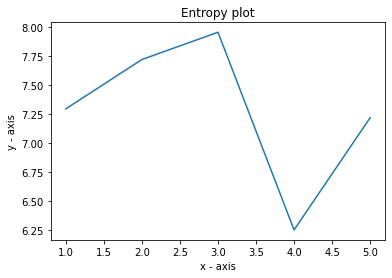

In [26]:
# importing the required module 
import matplotlib.pyplot as plt 
  
# x axis values 
x = [1,2,3,4,5] 
# corresponding y axis values 
y = [entropy1,entropy2,entropy3,entropy4,entropy5] 
  
# plotting the points  
plt.plot(x, y) 
  
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
  
# giving a title to my graph 
plt.title('Entropy plot') 
  
# function to show the plot 
plt.show() 

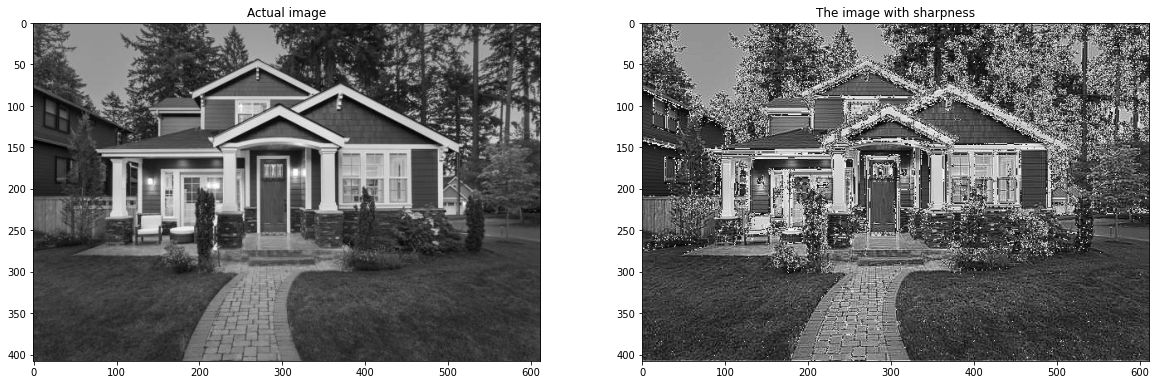

In [43]:
#plot_compared_img(input_image, image_sharpen, "Original image", "The image with noise")

def plot_compared_img(img1, img2, title1="Original image", title2="New one image"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(title1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(title2)
    plt.show()
    
plot_compared_img(input_image, image_sharpen, "Actual image", "The image with sharpness")

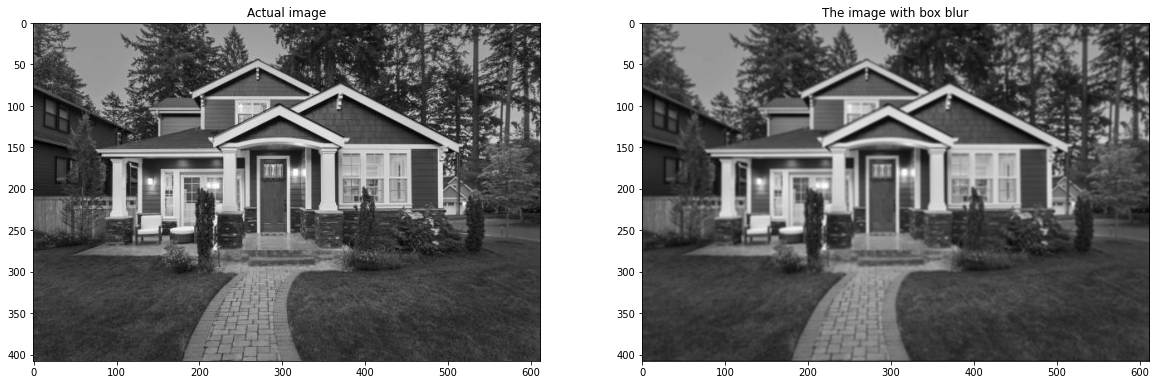

In [44]:
#plot_compared_img(input_image, image_sharpen, "Original image", "The image with noise")

def plot_compared_img(img1, img2, title1="Original image", title2="New one image"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(title1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(title2)
    plt.show()
    
plot_compared_img(input_image, imageboxblur, "Actual image", "The image with box blur")

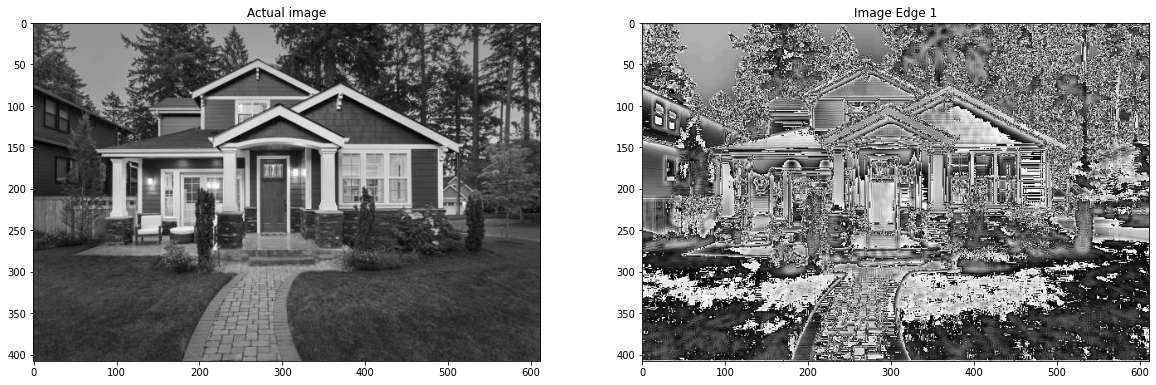

In [45]:
#plot_compared_img(input_image, image_sharpen, "Original image", "The image with noise")

def plot_compared_img(img1, img2, title1="Original image", title2="New one image"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(title1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(title2)
    plt.show()
    
plot_compared_img(input_image, image_edge1, "Actual image", "Image Edge 1")

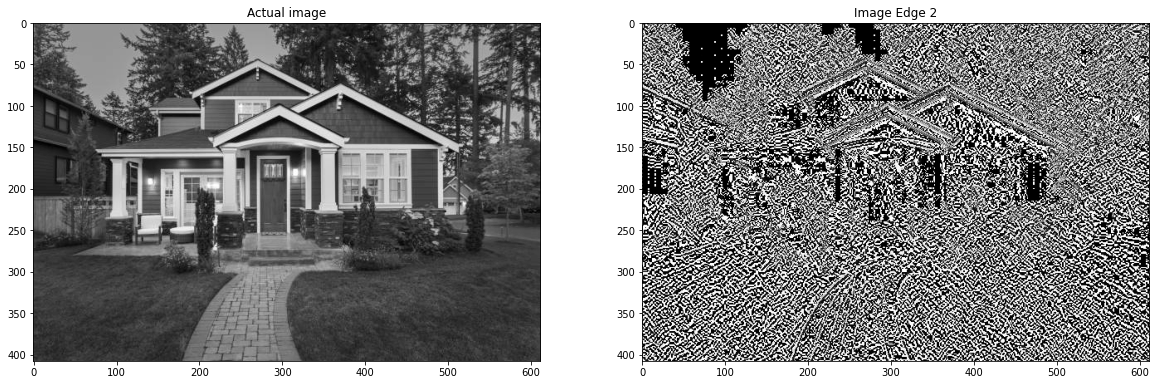

In [46]:
#plot_compared_img(input_image, image_sharpen, "Original image", "The image with noise")

def plot_compared_img(img1, img2, title1="Original image", title2="New one image"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(title1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(title2)
    plt.show()
    
plot_compared_img(input_image, image_edge2, "Actual image", "Image Edge 2")

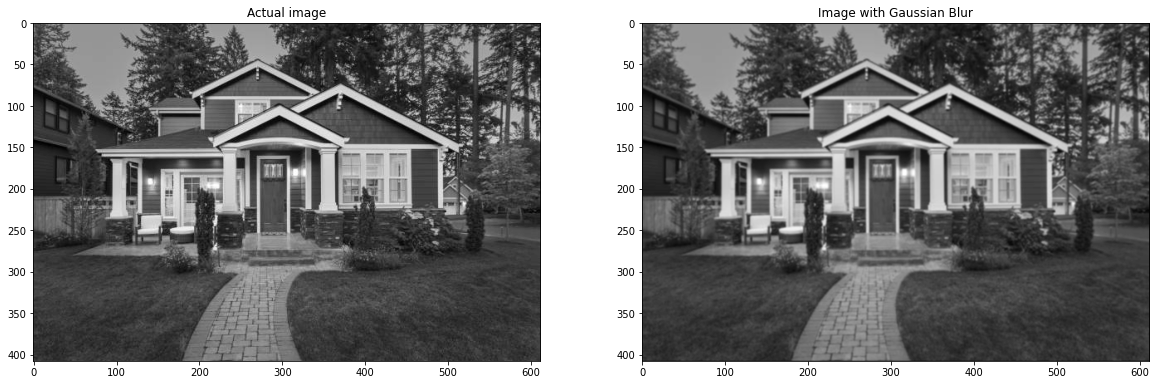

In [47]:
#plot_compared_img(input_image, image_sharpen, "Original image", "The image with noise")

def plot_compared_img(img1, img2, title1="Original image", title2="New one image"):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(title1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(title2)
    plt.show()
    
plot_compared_img(input_image, imagegaussianblur, "Actual image", "Image with Gaussian Blur")